In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras

from keras.datasets import mnist

In [2]:
# (X_train, y_train), (X_test, y_test) = mnist.load_data()
train_df = pd.read_csv("data/mnist_train.csv")
test_df = pd.read_csv("data/mnist_test.csv")

In [3]:
X_train = train_df.drop("label", axis=1).values.reshape(60000, 28,28)
X_test = test_df.drop("label", axis=1).values.reshape(10000, 28,28)
y_train = train_df["label"]
y_test = test_df["label"]

In [4]:
X_train.shape

(60000, 28, 28)

## Class Probabilities

In [5]:
y_count = np.zeros(10)
for label in y_train:
    y_count[label] += 1

print("y_counts: ", y_count, y_count.sum(), "\n")

# Probabilities per Label
label_probs = y_count/y_count.sum()*100
for i in range(10):
    print(f"Probability for Class {i}: {label_probs[i]:.2f} %")

y_counts:  [5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.] 60000.0 

Probability for Class 0: 9.87 %
Probability for Class 1: 11.24 %
Probability for Class 2: 9.93 %
Probability for Class 3: 10.22 %
Probability for Class 4: 9.74 %
Probability for Class 5: 9.04 %
Probability for Class 6: 9.86 %
Probability for Class 7: 10.44 %
Probability for Class 8: 9.75 %
Probability for Class 9: 9.92 %


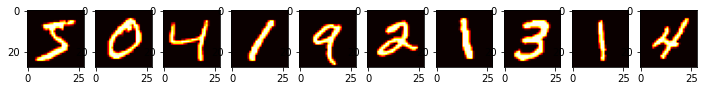

In [6]:
fig, ax = plt.subplots(1, 10, figsize=(12,12))
for i in range(10):
    ax[i].imshow(X_train[i], cmap="hot")
plt.show()

In [7]:
X_train.shape


(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

## Train

In [9]:
from sklearn import naive_bayes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold

def test_methods(model_selection: list,
                 X_train_2d, y_train,
                 X_test_2d, y_test) -> None:
    for method in model_selection:
        print(str(method.__name__).upper(), "\n")
        nb = method()

        # params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
        """
        gs_NB = GridSearchCV(estimator=nb,
        param_grid=params_NB,
                     cv=KFold,   # use any cross validation technique
                     verbose=1,
                     scoring='accuracy')
        """

        nb.fit(X_train_2d, y_train)
        pred = nb.predict(X_test_2d)
        score = nb.score(X_test_2d, y_test)
        print("Test accuracy: ", score, "\n")
        print(confusion_matrix(pred, y_test))

        print("\n\n")

In [10]:
X_train_2d = X_train.reshape((60000, 784))
X_test_2d = X_test.reshape((10000, 784))

methods = [naive_bayes.MultinomialNB, naive_bayes.GaussianNB, naive_bayes.BernoulliNB]
test_methods(methods, X_train_2d, y_train, X_test_2d, y_test)

MULTINOMIALNB 

Test accuracy:  0.8365 

[[ 912    0   15    4    2   23   17    1    6    6]
 [   0 1061   11   11    2   11   13   21   26    7]
 [   2    5  858   34    6    6   17   11   13    3]
 [   6    9   24  851    0  107    1    5   54   10]
 [   1    0   10    1  732   18    7   19   14   66]
 [   8    2    3   21    0  590   25    0   27   10]
 [  14    6   33    7   25   17  860    1    8    0]
 [   1    0   11   14    1    6    0  861    9   17]
 [  36   51   66   40   38   78   18   40  777   27]
 [   0    1    1   27  176   36    0   69   40  863]]



GAUSSIANNB 

Test accuracy:  0.5558 

[[ 870    0   79   32   19   71   12    0   13    5]
 [   0 1079   25   39    2   25   12   15   72    7]
 [   3    2  266    6    5    1    3    2    3    3]
 [   5    1   91  353    4   20    1   10    7    6]
 [   2    0    5    2  168    3    1    5    3    1]
 [   5    0    2    3    7   44    7    1   11    0]
 [  31   10  269   51   63   40  895    5   12    1]
 [   1    0    4

In [11]:
""" 
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


methods = [naive_bayes.GaussianNB]

X_train_2d = X_train.reshape((60000, 784))
X_test_2d = X_test.reshape((10000, 784))

for model in methods:
    print(str(model.__name__).upper(), "\n")
    nb = model()

    pipe = Pipeline(steps=[
                        ('pca', PCA()),
                        ('estimator', nb),
                        ])

    parameters = {'estimator__var_smoothing': [1e-2, 1e-1, 1, 2]}
    Bayes = GridSearchCV(pipe, parameters, scoring='accuracy', cv=10).fit(X_train_2d, y_train)

    print(Bayes.best_estimator_)
    print('best score:')
    print(Bayes.best_score_)
    predictions = Bayes.best_estimator_.predict(X_test_2d)

    pred = Bayes.predict(X_test_2d)
    score = Bayes.score(X_test_2d, y_test)
    print("Test accuracy: ", score, "\n")
    print(confusion_matrix(pred, y_test))

    print("\n\n")
"""

' \nfrom sklearn.pipeline import Pipeline\nfrom sklearn.decomposition import PCA\nfrom sklearn.model_selection import GridSearchCV\n\n\nmethods = [naive_bayes.GaussianNB]\n\nX_train_2d = X_train.reshape((60000, 784))\nX_test_2d = X_test.reshape((10000, 784))\n\nfor model in methods:\n    print(str(model.__name__).upper(), "\n")\n    nb = model()\n\n    pipe = Pipeline(steps=[\n                        (\'pca\', PCA()),\n                        (\'estimator\', nb),\n                        ])\n\n    parameters = {\'estimator__var_smoothing\': [1e-2, 1e-1, 1, 2]}\n    Bayes = GridSearchCV(pipe, parameters, scoring=\'accuracy\', cv=10).fit(X_train_2d, y_train)\n\n    print(Bayes.best_estimator_)\n    print(\'best score:\')\n    print(Bayes.best_score_)\n    predictions = Bayes.best_estimator_.predict(X_test_2d)\n\n    pred = Bayes.predict(X_test_2d)\n    score = Bayes.score(X_test_2d, y_test)\n    print("Test accuracy: ", score, "\n")\n    print(confusion_matrix(pred, y_test))\n\n    print

# Improving Accuracy

In [12]:
import cv2

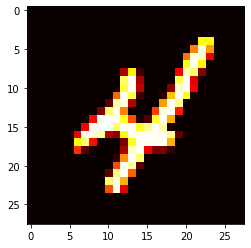

In [13]:
p = np.array(X_train[9], dtype="uint8")
p = p.reshape((28,28))
plt.imshow(p, cmap="hot")

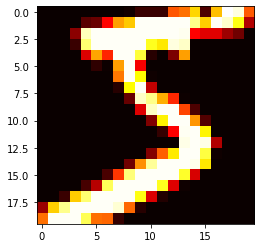

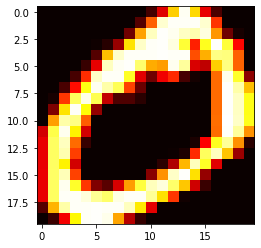

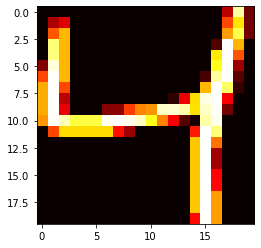

In [14]:
for i in range(3):
    p = np.array(X_train[i], dtype="uint8")
    p = p.reshape((28,28))
    x,y,w,h = cv2.boundingRect(p)
    img1 = p[y:(y+h), x:(x+w)]
    imgResized = cv2.resize(img1, (20,20))
    plt.imshow(imgResized, cmap='hot')
    plt.show()

In [15]:
def reduce_bl_pixels(dataset):
  my_arr = []
  for elem in dataset:
    p = np.array(elem, dtype="uint8")
    # p = elem
    p = p.reshape((28,28))
    x,y,w,h = cv2.boundingRect(p)
    img1 = p[y:(y+h), x:(x+w)]
    imgResized = cv2.resize(img1, (20,20))
    my_arr.append(imgResized)
  return my_arr


In [16]:
X_train_crop = reduce_bl_pixels(X_train)
X_test_crop = reduce_bl_pixels(X_test)

In [17]:
X_train_new = np.array(X_train_crop)
X_test_new = np.array(X_test_crop)

In [18]:
X_train_new[0].shape

(20, 20)

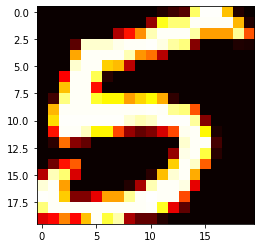

In [19]:
plt.imshow(X_train_new[20000], cmap="hot")


In [28]:
X_train_new = X_train_new.reshape((60000, 400))
X_test_new = X_test_new.reshape((10000, 400))

test_methods(methods, X_train_new, y_train, X_test_new, y_test)


MULTINOMIALNB 

Test accuracy:  0.8095 

[[949   3  29   2   2  17  21   2   8   5]
 [ 16 850  32  17  53  55  48 104  77  23]
 [  0  57 831  20   3   2   3  15  11   2]
 [  4   6  12 910   0  86   2  37  31  11]
 [  1  56   1   1 782   6  24  15  11  61]
 [  0  18   1  17   1 660   5   0  23   4]
 [  6  16  24   1  30  14 852   0   4   0]
 [  0  21  38  11   0   3   0 761  20  21]
 [  3  95  57  21  16  25   2  29 690  72]
 [  1  13   7  10  95  24   1  65  99 810]]



GAUSSIANNB 

Test accuracy:  0.8334 

[[930   1  15   5   1  14  14   1   8   4]
 [  0 908  15   6  32  11  15  55  45  21]
 [  5  49 848  24   5   3  11  39  28   7]
 [  2   2  10 870   0  61   1  13  13  10]
 [  6  35   6   1 830  10  37  18  14  50]
 [  8  13  12  29   8 722  18   5  31   6]
 [ 11  26  10   0  22  19 851   0   7   0]
 [  1  53  48  23   1   6   0 825  15  18]
 [ 14  36  56  38  16  27   8  20 704  47]
 [  3  12  12  14  67  19   3  52 109 846]]



BERNOULLINB 

Test accuracy:  0.7945 

[[935   0  29 

### Rotations

In [21]:
from scipy import ndimage

def rotate_dataset(dataset):
    data_rot = []
    for img in dataset:
        img_90 = ndimage.rotate(img.reshape(28,28), 180, reshape=False)
        data_rot.append(img_90.reshape(784))
    data_rot = np.array(data_rot)
    return data_rot

In [22]:
"""
fig = plt.figure(figsize=(10, 3))
ax1, ax2, ax3 = fig.subplots(1, 3)

img_45 = ndimage.rotate(X_train[1].reshape(28,28), 90, reshape=False)
full_img_45 = ndimage.rotate(X_train[1].reshape(28,28), 90, reshape=True)
ax1.imshow(img_45, cmap='gray')
ax1.set_axis_off()
ax2.imshow(full_img_45, cmap='gray')
ax2.set_axis_off()
ax3.imshow(X_train[1].reshape(28,28), cmap='gray')
ax2.set_axis_off()
fig.set_tight_layout(True)
plt.show()
"""

"\nfig = plt.figure(figsize=(10, 3))\nax1, ax2, ax3 = fig.subplots(1, 3)\n\nimg_45 = ndimage.rotate(X_train[1].reshape(28,28), 90, reshape=False)\nfull_img_45 = ndimage.rotate(X_train[1].reshape(28,28), 90, reshape=True)\nax1.imshow(img_45, cmap='gray')\nax1.set_axis_off()\nax2.imshow(full_img_45, cmap='gray')\nax2.set_axis_off()\nax3.imshow(X_train[1].reshape(28,28), cmap='gray')\nax2.set_axis_off()\nfig.set_tight_layout(True)\nplt.show()\n"

In [32]:
X_train_rot = []
for img in X_train:
    img_90 = ndimage.rotate(img.reshape(28,28), 180, reshape=False)
    X_train_rot.append(img_90.reshape(784))
X_train_rot = np.array(X_train_rot)

X_test_rot = []
for img in X_test:
    img_90 = ndimage.rotate(img.reshape(28,28), 180, reshape=False)
    X_test_rot.append(img_90.reshape(784))
X_test_rot = np.array(X_test_rot)

In [33]:
X_test_rot.shape

(10000, 784)

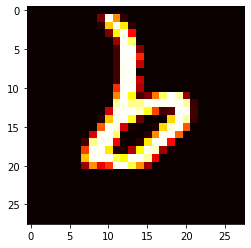

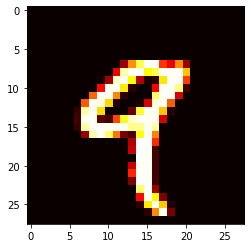

In [25]:
plt.imshow(X_train_rot[4].reshape(28,28), cmap="hot")
plt.show()

plt.imshow(X_train[4].reshape(28,28), cmap="hot")
plt.show()

### MNIST test

In [41]:
X_train = X_train.reshape(60000,784)
X_train.shape
test_methods(methods, X_train, y_train, X_test_rot, y_test)



MULTINOMIALNB 

Test accuracy:  0.181 

[[510   0 155   0 155   1  43   7   4  21]
 [  0 972   3   0   0   5  13   2  15   2]
 [328  30  37 181  23 400   8   9 334   7]
 [  4   1 237  23  16 168  61   0 159   2]
 [ 44   0  32   8  76  28  71   9   4   5]
 [  4  21 184  95  26  93   6   9  67   7]
 [ 23  32  32 343 601 114   2 982 291 963]
 [ 11   1  80   1   5   0 235   0   0   1]
 [ 51  76 262 358  76  81 142  10  97   1]
 [  5   2  10   1   4   2 377   0   3   0]]



GAUSSIANNB 

Test accuracy:  0.1673 

[[502   2 161  17 145  10  21   7  63   9]
 [  0 920   5  16   1  11  19   4  28   3]
 [ 50   3   9  42  52  65   0  63  37  18]
 [ 26  12 303  34 102 443  37   4 196   4]
 [164   1  25   6  18   8  27   6   5   1]
 [  3  11  15  24   4  11   0   4   3   1]
 [120 138  57 403 561 157   6 934 465 970]
 [ 11   0 123   1   5   2 105   1   1   0]
 [ 77  45 291 454  87 173 114   5 172   3]
 [ 27   3  43  13   7  12 629   0   4   0]]



BERNOULLINB 

Test accuracy:  0.1979 

[[ 484    0  15